In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys
sys.path.append('..')

from src import utils

from os import path
import joblib

In [2]:
DATE_MODEL = '20-03-28'

DATAFOLDER_PROCESSED = '/Users/navarmn/Work/Projects/2020-Corona/data/processed'
DATA_WORLD = 'time_series_19-covid-Confirmed-processed-03-28-20.csv'.format(DATE_MODEL)

DATAFOLDER_RAW = '/Users/navarmn/Work/Projects/2020-Corona/data/raw'
DATAFOLDER_COVID = path.join('COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series')

DATASET_CEARA = path.join(DATAFOLDER_RAW, 'ceara.csv')

In [3]:
df_ceara = pd.read_csv(DATASET_CEARA, index_col=0)
df_ceara.tail()

,cases,cured,deaths,refuses,suspects
data,,,,,
24/03/2020,185,0,0,0,0
25/03/2020,211,0,0,0,0
26/03/2020,235,0,3,0,0
27/03/2020,282,0,3,0,0
28/03/2020,314,0,4,0,0


In [4]:
data_world = pd.read_csv(path.join(DATAFOLDER_PROCESSED, DATA_WORLD), index_col=0)
data_world.tail()

,day,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
03/24/20,63,74,123,264,164,3,3,387,249,2044,...,97,248,8164,162,50,84,134,59,3,3
03/25/20,64,84,146,302,188,3,3,387,265,2364,...,145,333,9640,189,60,91,141,59,12,3
03/26/20,65,94,174,367,224,4,7,502,290,2810,...,196,333,11812,217,75,107,153,84,16,3
03/27/20,66,110,186,409,267,4,7,589,329,3143,...,310,405,14745,238,88,107,163,91,22,5
03/28/20,67,110,197,454,308,5,7,690,407,3640,...,356,468,17312,274,104,119,174,98,28,7


In [5]:
confirmed =    pd.read_csv(path.join(DATAFOLDER_RAW, DATAFOLDER_COVID, "time_series_covid19_confirmed_global.csv"))
# recovered =    pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
# deaths    =    pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
240,NaN,Libya,26.335100,17.228331,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
time_series = confirmed[confirmed.columns[4:]].values.tolist()

In [7]:
def get_country(country, df):
    return df[df["Country/Region"]==country][df.columns[4:]].values.tolist()

In [8]:
def plot_country(country,df):
    increments, smoothed_increments, cummulative = get_increments(get_country(country, df))
    plt.plot(np.log10(cummulative), np.log10(smoothed_increments), label=country)

In [9]:
def plot_country_increments(country,df):
    increments, smoothed_increments, cummulative = get_increments(get_country(country,df))
    plt.plot(np.arange(1, len(increments),1), np.log10(smoothed_increments[:-1]), label=country)

In [10]:
def get_increments(time_series, ceara=False, window_size=7):
    increments = []
    cummulative = []
    state = 0
    if not ceara:
        time_series = np.sum(np.array(time_series),axis=0)
    else:
        pass
#     print(time_series)
    for i in time_series:
        if i==0:
            continue
        else:
            increments.append(i-state)
            cummulative.append(i)
            state = i
    window_size = window_size
    smoothed_increments = []
    for i in range(len(increments)):
        smoothed_increments.append(np.mean(increments[np.max([i-window_size,0]):i+1])+1)
    return increments, smoothed_increments, cummulative

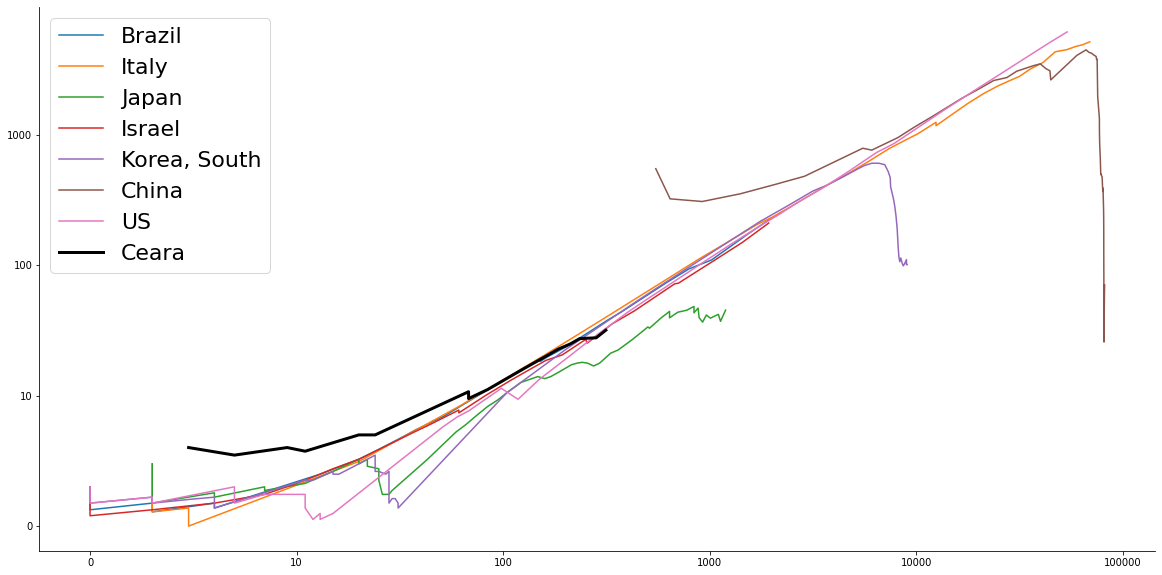

In [11]:
countries = ["Brazil", "Italy", "Japan", "Israel",
             "Korea, South", "China", "US"]
plt.figure(figsize=(20,10))
for country in countries:
    plot_country(country, confirmed)
    
increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True)
plt.plot(np.log10(cummulative), np.log10(smoothed_increments), 'black', label='Ceara', linewidth=3)

plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
# plt.savefig("gsadgsdgd.jpg",dpi=300)

plt.show()

[3, 2, 4, 2, 9, 4, 44, 0, 16, 41, 39, 21, 26, 24, 47, 32]


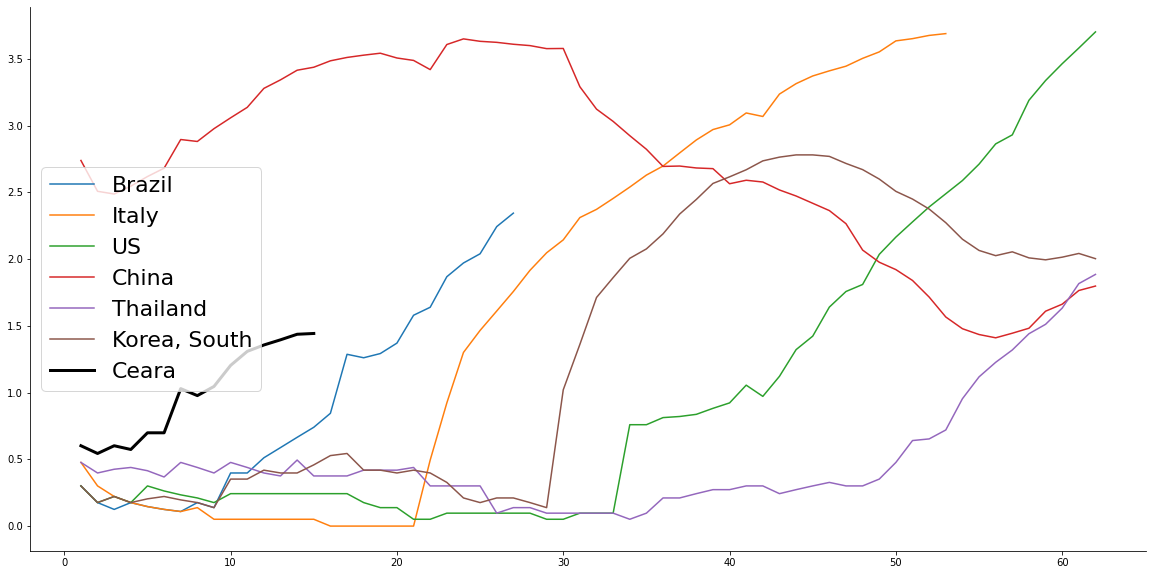

In [12]:
countries = ["Brazil", "Italy", "US", "China", "Thailand", "Korea, South"]

plt.figure(figsize=(20,10))
for country in countries:
    plot_country_increments(country, confirmed)
    
increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True, window_size=7)
print(increments)
plt.plot(np.arange(1, len(increments),1), np.log10(smoothed_increments[:-1]), 'black', label='Ceara', linewidth=3)

# plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

# plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
# plt.savefig("gsadgsdgd.jpg",dpi=300)

plt.show()

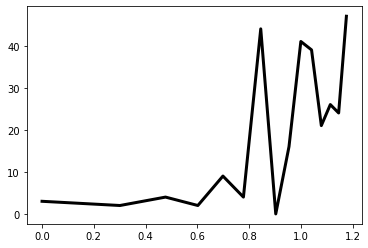

In [13]:
increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True)
plt.plot(np.log10(np.arange(1, len(increments),1)), increments[:-1], 'black', label='Ceara', linewidth=3)

# Using the service made by Gabriel

In [38]:
import requests
import json

#### list all countries

In [15]:
r = requests.get('http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats/listCountrys')

In [16]:
r.json()[0]

{'country': 'Thailand'}

In [17]:
coutries = []
for country in r.json():
    countries.append(country['country'])

In [18]:
len(countries)

958

In [19]:
r = requests.get('http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats/Country?Country={}'.format('Brazil'))
r.json()[0]

{'cases': 0,
 'data': '01/22/20',
 'deaths': 0,
 'lat': -14.235,
 'long': -51.9253,
 'recovered': 0}

THE ABOVE PART IS DISCONSIDERED FOR NOW. THERE IS NO WAY TO FILTER BY COUNTRY, THE WAY IT RETURNS

In [20]:
LIST_OF_COUNTRIES = ["Brazil", "Italy", "US", "China", "Thailand", "Korea, South", "Spain"]

dates = []

r = requests.get('http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats/Country?Country={}'.format('China'))

for day in r.json():
    dates.append(day['data'])
    
confirmed_df = pd.DataFrame(columns=dates, index=LIST_OF_COUNTRIES)
deaths_df = pd.DataFrame(columns=dates, index=LIST_OF_COUNTRIES)
recovered_df = pd.DataFrame(columns=dates, index=LIST_OF_COUNTRIES)

for country in LIST_OF_COUNTRIES:
    print('{}'.format(country))
    r = requests.get('http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats/Country?Country={}'.format(country))

    cases = []
    deaths = []
    recovered = []
    for day in r.json():
        cases.append(day['cases'])
#         deaths.append(day['deaths'])
#         recovered.append(day['recovered'])
        actual_day = day['data']
#         print('Country: {}'.format(country))
#         print('Day: {} - Cases: {}'.format(actual_day, day['cases']))
#         by_country_df = confirmed_df.loc[confirmed_df['Country/Region'] == country]
#         by_country_df[actual_day] = day['cases']
#         print(by_country_df[actual_day])
        confirmed_df.loc[country, day['data']] = day['cases']
        deaths_df.loc[country, day['data']] = day['deaths']
        recovered_df.loc[country, day['data']] = day['recovered']
#     confirmed_df.loc[confirmed_df['Country/Region'] == country] = cases
    print('Finished this country: {} \n ================='.format(country))

confirmed_df

Brazil
Finished this country: Brazil 
Italy
Finished this country: Italy 
US
Finished this country: US 
China
Finished this country: China 
Thailand
Finished this country: Thailand 
Korea, South
Finished this country: Korea, South 
Spain
Finished this country: Spain 


,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,...,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20
Brazil,0,0,0,0,0,0,0,0,0,0,...,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044
Italy,0,0,0,0,0,0,0,0,0,2,...,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242
US,1,1,2,2,9,10,10,11,14,18,...,61809,74654,94708,113843,135028,155607,178132,205805,18994,264077
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432
Thailand,2,3,5,7,8,8,14,14,14,19,...,827,934,1045,1136,1245,1388,1524,1651,1771,1875
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,9037,9137,9241,9332,9478,9583,9661,9786,9887,9976
Spain,0,0,0,0,0,0,0,0,0,0,...,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065


In [21]:
deaths_df

,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,...,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20
Brazil,0,0,0,0,0,0,0,0,0,0,...,46,59,77,92,111,136,159,201,240,324
Italy,0,0,0,0,0,0,0,0,0,0,...,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915
US,0,0,0,0,0,0,0,0,0,0,...,748,988,1279,1663,2119,2585,3122,4050,207,6159
China,17,18,26,42,56,82,131,133,171,213,...,3281,3285,3291,3296,3299,3304,3308,3309,3316,3322
Thailand,0,0,0,0,0,0,0,0,0,0,...,4,4,4,5,6,7,9,10,12,15
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,120,126,131,139,144,152,158,162,165,169
Spain,0,0,0,0,0,0,0,0,0,0,...,2808,3647,4365,5138,5982,6803,7716,8464,9387,10348


In [22]:
recovered_df

,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,...,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20
Brazil,0,0,0,0,0,0,0,0,0,0,...,2,2,6,6,6,6,120,127,127,127
Italy,0,0,0,0,0,0,0,0,0,0,...,8326,9362,10361,10950,12384,13030,14620,15729,16847,18278
US,0,0,0,0,0,0,0,0,2,2,...,523,550,1036,1380,1637,3499,6657,8668,10665,11586
China,28,30,36,39,49,58,101,120,135,214,...,73280,73773,74181,74720,75100,75582,75923,76206,76405,76565
Thailand,0,0,0,0,2,2,5,5,5,5,...,52,70,88,97,97,97,229,342,505,505
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,3507,3730,4144,4528,4811,5033,5228,5408,5567,5828
Spain,0,0,0,0,0,0,0,0,0,0,...,3794,5367,7015,9357,12285,14709,16780,19259,22647,26743


In [23]:
def plot_country_2(country, df):
    increments, smoothed_increments, cummulative = get_increments_2(df.loc[country].values.tolist())
    plt.plot(np.log10(cummulative), np.log10(smoothed_increments), label=country)

In [24]:
def plot_country_increments_2(country, df):
    increments, smoothed_increments, cummulative = get_increments_2(df.loc[country].values.tolist())
    plt.plot(np.arange(1, len(increments),1), np.log10(smoothed_increments)[:-1], label=country)

In [25]:
def get_increments_2(time_series, ceara=False):
    increments = []
    cummulative = []
    state = 0
    if not ceara:
        pass
#         time_series = np.sum(np.array(time_series),axis=0)
    else:
        pass
#     print(time_series)
    for i in time_series:
        if i==0:
            continue
        else:
            increments.append(i-state)
            cummulative.append(i)
            state = i
    window_size = 7
    smoothed_increments = []
    for i in range(len(increments)):
        smoothed_increments.append(np.mean(increments[np.max([i-window_size,0]):i+1])+1)
    return increments, smoothed_increments, cummulative

/Users/navarmn/Work/Projects/venvs/data-science/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


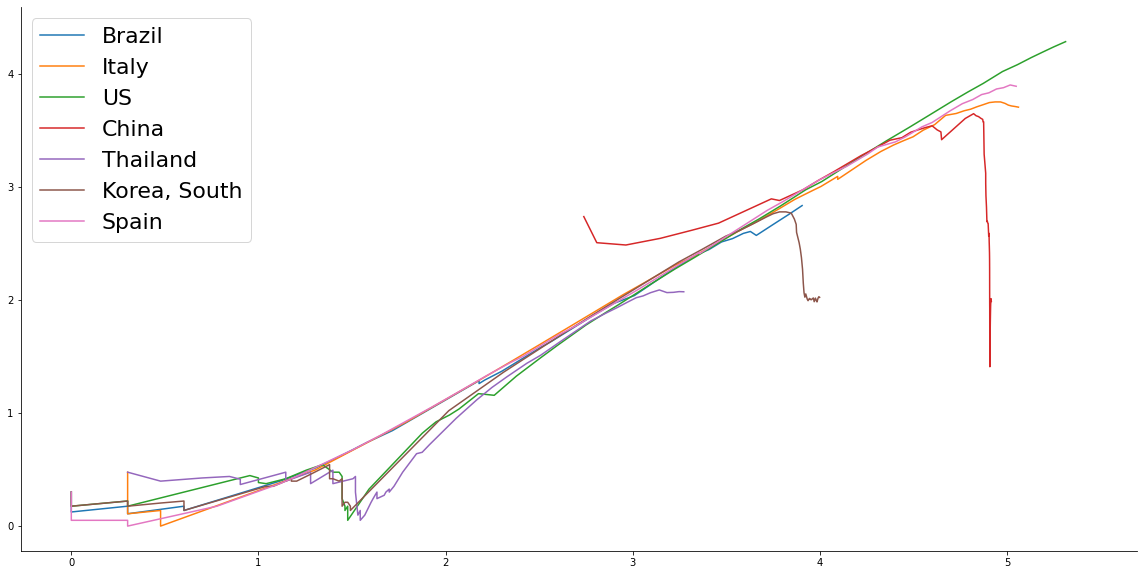

In [26]:
plt.figure(figsize=(20,10))
for country in LIST_OF_COUNTRIES:
    plot_country_2(country, confirmed_df)
    
# increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True)
# plt.plot(np.arange(1, len(increments),1), np.log10(increments[:-1]), 'black', label='Ceara', linewidth=3)

# plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

# plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
# plt.savefig("gsadgsdgd.jpg",dpi=300)

plt.show()

/Users/navarmn/Work/Projects/venvs/data-science/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


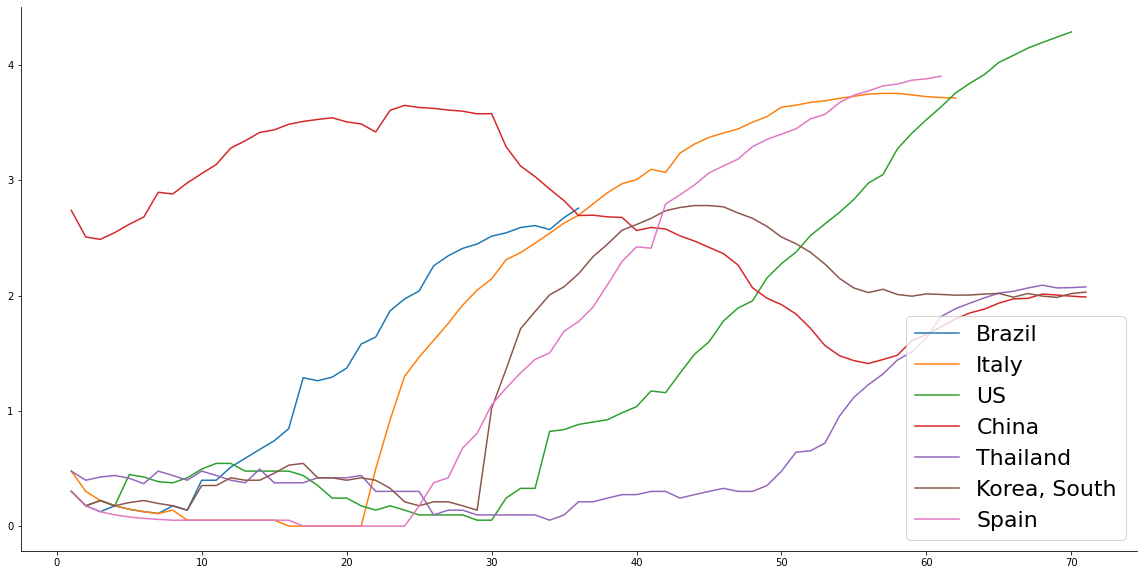

In [27]:
plt.figure(figsize=(20,10))
for country in LIST_OF_COUNTRIES:
    plot_country_increments_2(country, confirmed_df)
    
# increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True)
# plt.plot(np.arange(1, len(increments),1), np.log10(increments[:-1]), 'black', label='Ceara', linewidth=3)

# plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

# plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
# plt.savefig("gsadgsdgd.jpg",dpi=300)

plt.show()

## Using the service made by gabriel. Get data of all **States**

In [65]:
url = 'http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats/listBrStates'

r = requests.get(url)

r.json()

[{'estado': 'Acre', 'uf': 'AC'},
 {'estado': 'Alagoas', 'uf': 'AL'},
 {'estado': 'Amazonas', 'uf': 'AM'},
 {'estado': 'Amapa', 'uf': 'AP'},
 {'estado': 'Bahia', 'uf': 'BA'},
 {'estado': 'Ceara', 'uf': 'CE'},
 {'estado': 'Distrito Federal', 'uf': 'DF'},
 {'estado': 'Espirito Santo', 'uf': 'ES'},
 {'estado': 'Goias', 'uf': 'GO'},
 {'estado': 'Maranhao', 'uf': 'MA'},
 {'estado': 'Mato Grosso', 'uf': 'MT'},
 {'estado': 'Mato Grosso do Sul', 'uf': 'MS'},
 {'estado': 'Minas Gerais', 'uf': 'MG'},
 {'estado': 'Para', 'uf': 'PA'},
 {'estado': 'Paraiba', 'uf': 'PB'},
 {'estado': 'Parana', 'uf': 'PR'},
 {'estado': 'Pernambuco', 'uf': 'PE'},
 {'estado': 'Piaui', 'uf': 'PI'},
 {'estado': 'Rio de Janeiro', 'uf': 'RJ'},
 {'estado': 'Rio Grande do Norte', 'uf': 'RN'},
 {'estado': 'Rondonia', 'uf': 'RO'},
 {'estado': 'Rio Grande do Sul', 'uf': 'RS'},
 {'estado': 'Roraima', 'uf': 'RR'},
 {'estado': 'Santa Catarina', 'uf': 'SC'},
 {'estado': 'Sergipe', 'uf': 'SE'},
 {'estado': 'Sao Paulo', 'uf': 'SP'},
 

In [33]:
url = 'http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats?BrState=CE'

r = requests.get(url)

r.json()[0]

{'cases': 0,
 'cured': 0,
 'data': '30/01/2020',
 'deaths': 0,
 'internadosDomiciliar': 0,
 'internadosEnfermaria': 0,
 'internadosUTI': 0,
 'percentual_cured': 0.0,
 'percentual_deaths': 0.0,
 'percentual_internados': 0.0,
 'percentual_internadosDomiciliar': 0.0,
 'percentual_internadosEnfermaria': 0.0,
 'percentual_internadosUTI': 0.0,
 'refuses': 0,
 'suspects': 1,
 'total_internados_DB': 0}

In [46]:
def download_state(URL='http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats?BrState=', state='CE'):
    URL = URL + state
    r = requests.get(URL)
    d = json.loads(r.text)
    with open('{}.json'.format(state), 'w', encoding='utf-8') as f:
        json.dump(d, f, ensure_ascii=False, indent=4)
    
    df = pd.read_json('{}.json'.format(state))
    df.set_index(df['data'], inplace=True)
    df.drop(columns=['data'], inplace=True)
#     print(df)

    df.to_csv('{}.csv'.format(state))
    
    return df

In [51]:
df_state = download_state(state='SP')
df_state.tail()

,cases,cured,deaths,internadosDomiciliar,internadosEnfermaria,internadosUTI,percentual_cured,percentual_deaths,percentual_internados,percentual_internadosDomiciliar,percentual_internadosEnfermaria,percentual_internadosUTI,refuses,suspects,total_internados_DB
data,,,,,,,,,,,,,,,
30/03/2020,1517,0,113,0,0,0,0,0,0,0,0,0,0,0,0
31/03/2020,2339,0,136,0,0,0,0,0,0,0,0,0,0,0,0
01/04/2020,2981,0,164,0,0,0,0,0,0,0,0,0,0,0,0
02/04/2020,3506,0,188,0,0,0,0,0,0,0,0,0,0,0,0
03/04/2020,4048,0,219,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
url = 'http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats/listBrStates'

r = requests.get(url)

states = {}

for state in r.json():
    states[state['uf']] = download_state(state=state['uf'])

In [64]:
states['CE']

,cases,cured,deaths,internadosDomiciliar,internadosEnfermaria,internadosUTI,percentual_cured,percentual_deaths,percentual_internados,percentual_internadosDomiciliar,percentual_internadosEnfermaria,percentual_internadosUTI,refuses,suspects,total_internados_DB
data,,,,,,,,,,,,,,,
30/01/2020,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
31/01/2020,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
01/02/2020,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
02/02/2020,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
03/02/2020,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/03/2020,382,0,5,341,14,19,0,1.308901,8.638743,89.267016,42.424242,57.575758,0,0,33
31/03/2020,401,0,7,337,23,22,0,1.745636,11.221945,84.039900,51.111111,48.888889,0,0,45
01/04/2020,445,0,9,362,30,21,0,2.022472,11.460674,81.348315,58.823529,41.176471,0,0,51


In [66]:
url = 'http://lapisco.fortaleza.ifce.edu.br:3011/api/covid19stats/listBrStates'

r = requests.get(url)

states = {}

for state in r.json():
    print(state['uf'])

AC
AL
AM
AP
BA
CE
DF
ES
GO
MA
MT
MS
MG
PA
PB
PR
PE
PI
RJ
RN
RO
RS
RR
SC
SE
SP
TO


# Create a COVID19-INDEX

## The number of increments normalized by cummulative number of cases

In [28]:
def plot_country_increments_normalized(country, df):
    df_filtered = confirmed_df.loc[country, confirmed_df.loc[country] != 0]
    increments, smoothed_increments, cummulative = get_increments_2(df_filtered.values.tolist())
    plt.plot(np.arange(1, len(increments)+1,1), np.array(smoothed_increments)/cummulative, label=country)

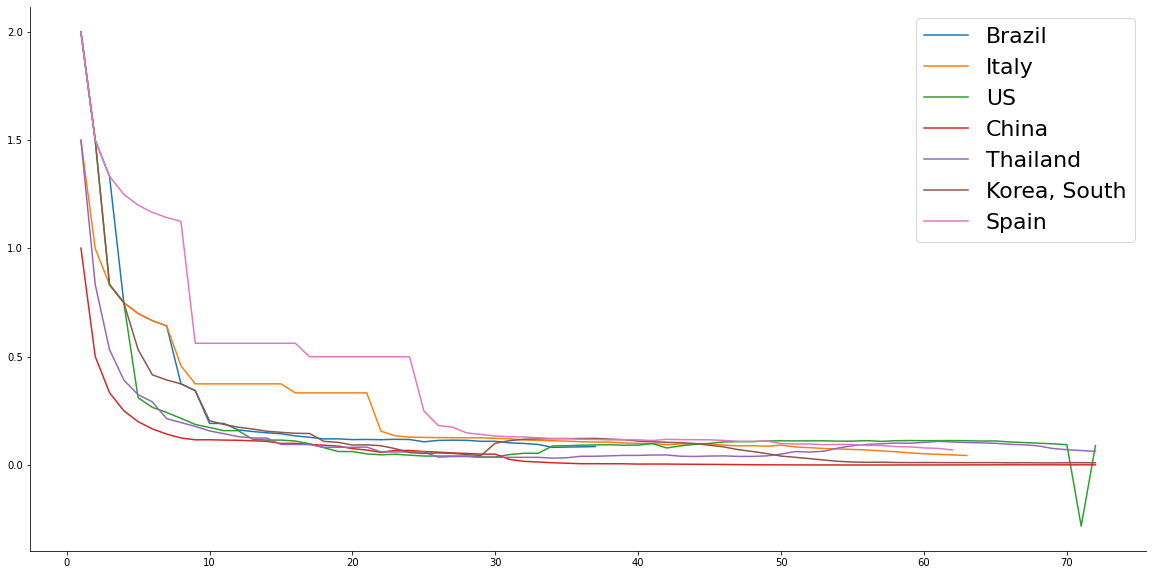

In [29]:
plt.figure(figsize=(20,10))
for country in LIST_OF_COUNTRIES:
    plot_country_increments_normalized(country, confirmed_df)
    
# increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True)
# plt.plot(np.arange(1, len(increments),1), np.log10(increments[:-1]), 'black', label='Ceara', linewidth=3)

# plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

# plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
# plt.savefig("gsadgsdgd.jpg",dpi=300)

plt.show()

## The number of increments normalized by population

In [245]:
def plot_country_increments_population(country, df):
    df_filtered = confirmed_df.loc[country, confirmed_df.loc[country] != 0]
    increments, smoothed_increments, cummulative = get_increments_2(df_filtered.values.tolist())
    plt.plot(np.arange(1, len(increments)+1,1), np.array(smoothed_increments)/POPULATION[country], label=country)

In [253]:
POPULATION = {
    'China': 1.386e9,
    'Italy': 60.48e6,
    'Korea, South': 51.47e6,
    'Spain': 46.66e6,
    'Brazil': 209.3e6,
    'Thailand': 69.04e6,
    'Ceara': 8.843e6,
    'US': 327.2e6
}

LIST_OF_COUNTRIES = ["Brazil", "Italy", "US", "China", "Thailand", "Korea, South", "Spain"]


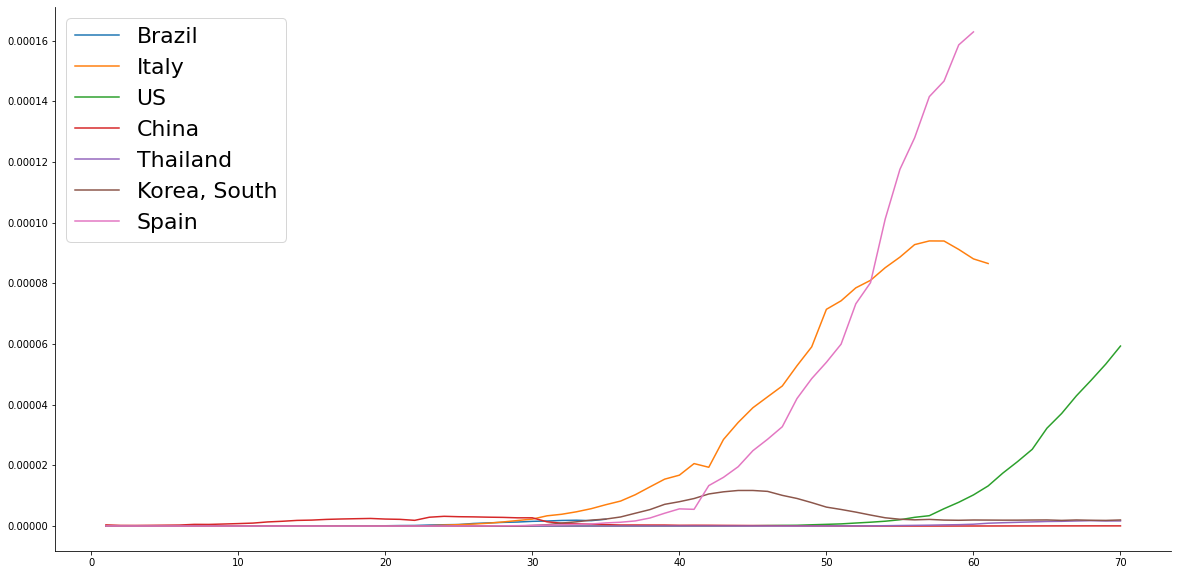

In [254]:
plt.figure(figsize=(20,10))
for country in LIST_OF_COUNTRIES:
    plot_country_increments_population(country, confirmed_df)
    
# increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True)
# plt.plot(np.arange(1, len(increments),1), np.log10(increments[:-1]), 'black', label='Ceara', linewidth=3)

# plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

# plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
# plt.savefig("gsadgsdgd.jpg",dpi=300)

plt.show()

In [256]:
POPULATION = {
    'China': 1.386e9,
    'Italy': 60.48e6,
    'Korea, South': 51.47e6,
    'Spain': 46.66e6,
    'Brazil': 209.3e6,
    'Thailand': 69.04e6,
    'Ceara': 8.843e6,
    'US': 327.2e6
}

In [288]:
def calculated_covid19idx(confirmed_df, deaths_df, recovered_df, country):
    df_filtered_cases = confirmed_df.loc[country, confirmed_df.loc[country] != 0]
    df_filtered_deaths = deaths_df.loc[country, df_filtered_cases.index]
    df_filtered_recovered = recovered_df.loc[country, df_filtered_cases.index]
    
#     print(df_filtered_cases.shape)
#     print(df_filtered_deaths.shape)
#     print(df_filtered_recovered.shape)

    cases = df_filtered_cases.values
    deaths = df_filtered_deaths.values
    recovered = df_filtered_recovered.values
    
    increments, smoothed_increments, cummulative = get_increments_2(df_filtered_cases.values.tolist())


    covid19idx = (3*((cases/POPULATION[country]) * (cases/cummulative)) + 5*(deaths/POPULATION[country] + deaths/cummulative) - 2*(recovered/POPULATION[country] - recovered/cummulative))/10
    
#     covid19idx = (cases/POPULATION[country]) ** (cases/cummulative)
    
#     covid19idx = 3*recovered/POPULATION[country] - 3*recovered/cummulative


    
    smoothed_idx = []
    window_size = 7
    for i in range(len(covid19idx.tolist())):
        smoothed_idx.append(np.mean(covid19idx[np.max([i-window_size,0]):i+1])+1)
        
#     print(covid19idx)

    return np.array(smoothed_idx)

In [289]:
def plot_covid19idx(country, confirmed_df, deaths_df, recovered_df):
    covid19idx = calculated_covid19idx(confirmed_df, deaths_df, recovered_df, country)
    
    plt.plot(np.arange(1, covid19idx.shape[0]+1, 1), covid19idx, label=country)

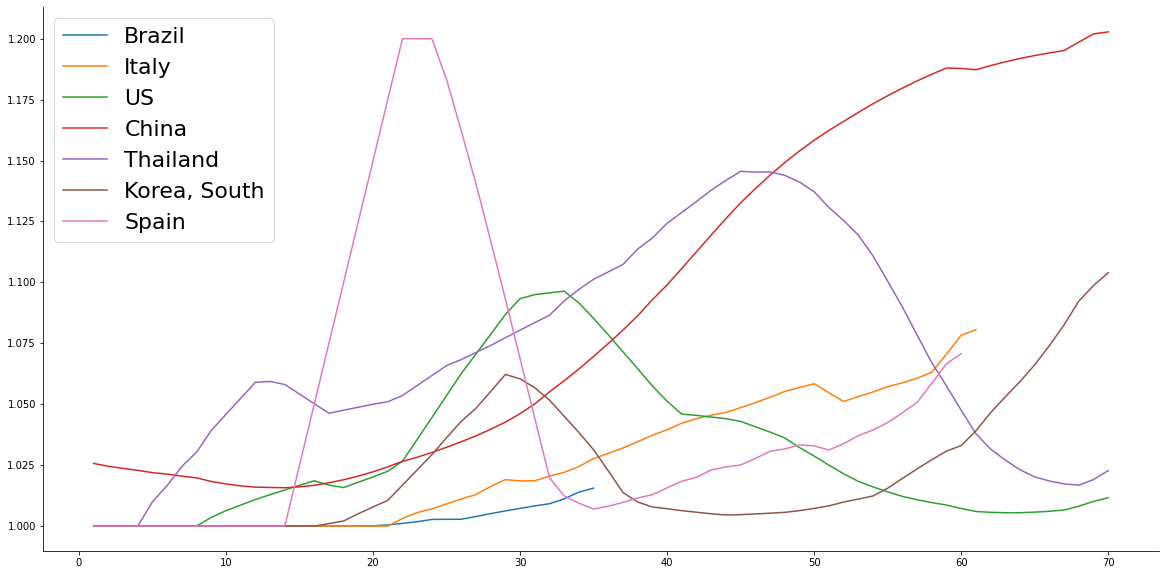

In [290]:
plt.figure(figsize=(20,10))

for country in LIST_OF_COUNTRIES:
    plot_covid19idx(country, confirmed_df, deaths_df, recovered_df)

# plt.xticks(range(6),labels=[0,10,100,1000,10000,100000])

# plt.yticks(range(4),labels=[0,10,100,1000])
sns.despine()
plt.legend(fontsize=22)
# plt.savefig("gsadgsdgd.jpg",dpi=300)

plt.show()

In [281]:
LIST_OF_COUNTRIES

['Brazil', 'Italy', 'US', 'China', 'Thailand', 'Korea, South', 'Spain']

In [197]:
country = 'Brazil'

df_filtered_cases = confirmed_df.loc[country, confirmed_df.loc[country] != 0]
df_filtered_deaths = deaths_df.loc[country, df_filtered_cases.index]
df_filtered_recovered = recovered_df.loc[country, df_filtered_cases.index]

cases = df_filtered_cases.values
deaths = df_filtered_deaths.values
recovered = df_filtered_recovered.values

increments, smoothed_increments, cummulative = get_increments_2(df_filtered.values.tolist())


covid19idx = (cases/POPULATION[country]) * (cases/cummulative) + 5*deaths/POPULATION[country] + 5*deaths/cummulative - 3*recovered/POPULATION[country] - 3*recovered/cummulative


covid19idx

array([ 4.77783086e-09,  4.77783086e-09,  4.77783086e-09,  9.55566173e-09,
        9.55566173e-09,  9.55566173e-09,  9.55566173e-09,  1.91113235e-08,
        1.91113235e-08,  6.21118012e-08,  6.21118012e-08,  9.55566173e-08,
        1.19445772e-07,  1.48112757e-07,  1.81557573e-07,  2.48447205e-07,
        7.21452461e-07,  7.21452461e-07,  7.74008600e-07, -1.49990588e-02,
       -3.11373589e-03,  2.41953687e-02,  3.86504247e-02,  6.17946913e-02,
       -5.87174208e-03, -3.75889593e-03,  8.52490613e-02,  9.97002795e-02,
        1.13169417e-01,  1.22964089e-01,  1.29371671e-01,  1.37572448e-01,
        1.55568610e-01,  9.50228641e-02,  1.09178451e-01])

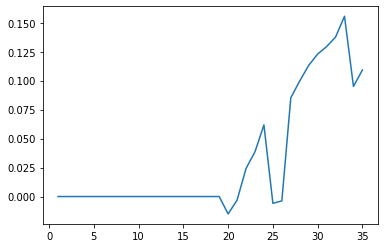

In [185]:
plt.plot(np.arange(1, covid19idx.shape[0]+1, 1), covid19idx)

In [174]:
(np.array((increments))/confirmed_df.loc[country].values).shape

ValueError: operands could not be broadcast together with shapes (35,) (70,) 

In [66]:
increments[-1]

127

In [30]:
LIST_OF_DAYS = confirmed_df.drop(['Country/Region'], axis=1).columns

KeyError: "['Country/Region'] not found in axis"

In [31]:
confirmed_df.loc[confirmed_df['Country/Region'] == 'US'][LIST_OF_DAYS] = cases
confirmed_df

KeyError: 'Country/Region'

In [ ]:
r.json()[0]

In [ ]:
base_colums = ['Country/Region']

dates = []
cases = []
deaths = []
recovered = []
for day in r.json():
    dates.append(day['data'])
    cases.append(day['cases'])
    deaths.append(day['deaths'])
    recovered.append(day['recovered'])

In [ ]:
confirmed_df = pd.DataFrame(columns=base_colums + dates)
confirmed_df['Country/Region'] = LIST_OF_COUNTRIES
confirmed_df

In [ ]:
for day in dates:
    for country in LIST_OF_COUNTRIES:
        confirmed_df.loc[confirmed_df['Country/Region'] == country][day] = 

In [ ]:
confirmed.columns

In [ ]:
increments, smoothed_increments, cummulative = get_increments(df_ceara['cases'].values.tolist(), ceara=True)
X = np.array(utils.count_days(dayone='03/14/20', date_string='%m/%d/%y')).reshape(-1,1)[:-1]
plt.plot(X, increments)

In [ ]:
increments

In [ ]:
def get_x_y_by_country(data_world, country='Italy'):
    data = data_world[country].loc[data_world[country] != 0]
    y = data.values
    X = np.array(utils.count_days(dayone=data.index[0], date_string='%m/%d/%y')).reshape(-1,1)
    
    return X[:-2], y

In [ ]:
X, y = get_x_y_by_country(data_world, country='China')
plt.plot(X, np.log10(y))